In [ ]:
!mkdir -p ~./kaggle  #kaggle json loading
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats #copied api token

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 77.7MB/s]
100% 1.06G/1.06G [00:08<00:00, 128MB/s] 


In [ ]:
#we are unzipping the zip file
import zipfile
zip_file = zipfile.ZipFile('/content/dogs-vs-cats.zip' , 'r')
zip_file.extractall('/content')
zip_file.close()


In [ ]:
#importing all imp linrary
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D , MaxPool2D , Dense , Flatten ,Dropout , BatchNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
#i used genrators , not outmaxing my ram , it works on batches or craete batches.........
train_data =keras.utils.image_dataset_from_directory(
    directory='/content/train',
    label_mode ='int', #it will assin some value ed 1, 0 for positive and neg
    batch_size = 32,
    image_size=(256, 256) #it will reshape image to 256, 256 coz imitailly it is of diff  shape
)



Found 20000 files belonging to 2 classes.


In [ ]:
test_data = train_data =keras.utils.image_dataset_from_directory(
    directory='/content/test',
    label_mode ='int',
    batch_size = 32,
    image_size=(256, 256) #it will reshape image to 256, 256 coz imitailly it is of diff  shape
)


Found 5000 files belonging to 2 classes.


In [ ]:
#we need to normalise it
def rescale (image , label):
  image = tf.cast(image/255, tf.float32) #so we conveted into 0-1 backet
  return image,label
train_data = train_data.map(rescale)
test_data = test_data.map(rescale)

In [ ]:
#now to creating model , having 3 conv layers  of 32, 65, 128, and valid padding
#for non linearity  i used relu

model =Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), padding ='valid', activation ='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides = 2 , padding ='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3, 3), padding ='valid', activation ='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides = 2 , padding ='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = (3, 3), padding ='valid', activation ='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides = 2 , padding ='valid'))
model.add(BatchNormalization())



#now add to  ANN
model = Sequential()
model.add(Flatten())

model.add(Dense(128 ,activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1 , activation ='sigmoid'))





In [ ]:
#model.build(input_shape=(256, 256, 3))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 196608)            0         
                                                                 
 dense_9 (Dense)             (None, 128)               25165952  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 25174273 (96.03 MB)
Trainable params: 25

In [ ]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics =['accuracy'])

In [ ]:
history =model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
157/157 [==============================] - 17s 110ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
157/157 [==============================] - 15s 94ms/step - loss: 0.6932 - accuracy: 0.4888 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
157/157 [==============================] - 16s 98ms/step - loss: 0.6932 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
157/157 [==============================] - 16s 102ms/step - loss: 0.6932 - accuracy: 0.4906 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
157/157 [==============================] - 15s 93ms/step - loss: 0.6932 - accuracy: 0.4928 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
157/157 [==============================] - 15s 94ms/step - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
157/157 [==============================] - 17s 103ms/step - loss: 0.6932 - accuracy: 0.4890 - val_loss: 0.6931 - val_accura

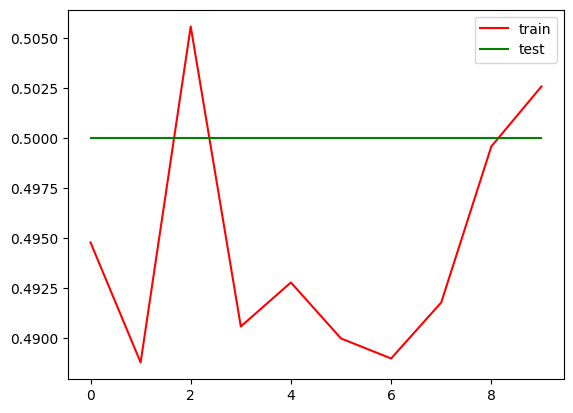

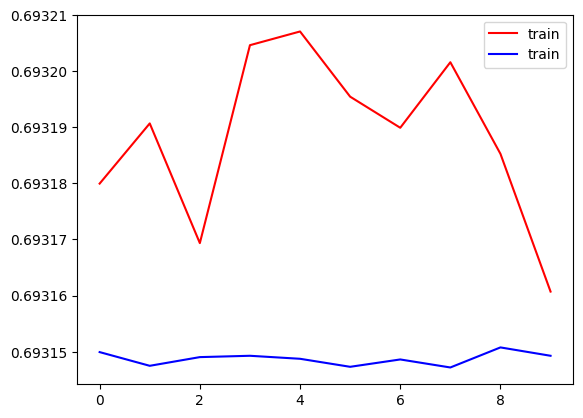

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color ='red', label ='train')
plt.plot(history.history['val_accuracy'], color='green', label ='test')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color ='red', label ='train')
plt.plot(history.history['val_loss'], color ='blue', label ='train')

plt.legend()
plt.show()

In [ ]:
!pip3 install opencv-python

In [ ]:
import cv2

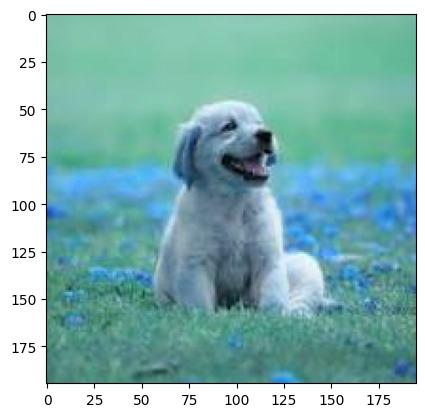

In [ ]:
load_img = cv2.imread('/content/dog_cf.jpeg')
plt.imshow(load_img)

In [ ]:
load_img.shape

(195, 195, 3)

In [ ]:
load_img =cv2.resize(load_img ,(256, 256))
load_imput = load_img.reshape(1, 256, 256,3)

In [ ]:
model.predict(load_imput)

1/1 [==============================] - 0s 55ms/step


array([[0.50104123]], dtype=float32)

(360, 543, 3)

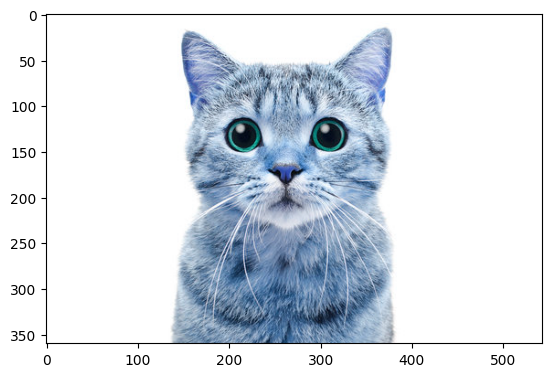

In [ ]:
#for cat test

load2_img= cv2.imread('/content/cat_cf.jpg')
plt.imshow(load2_img)
load2_img.shape

In [ ]:

load2_img =cv2.resize(load2_img ,(256, 256))
load2_input = load2_img.reshape(1, 256, 256,3)


In [ ]:
model.predict(load2_input)

1/1 [==============================] - 0s 18ms/step


array([[0.50104123]], dtype=float32)